In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df_non_central = df[df['neighbourhood_group_cleansed'] != 'Central Region']

In [4]:
selected_columns = [
    'price',
    'availability_365',
    'review_scores_rating',
    'neighbourhood_group_cleansed'
    'room_type'
]

In [ ]:
roomtype_map = {'Private room': 0, 'Entire home/apt': 1}
neighbourhood_map = {'North Region': 0, 'East Region': 1, 'North-east Region': 2, 'West Region': 3}

df['roomtype'] = df['room_type'].map(roomtype_map)
df['neighbourhood'] = df['neighbourhood_group_cleansed'].map(neighbourhood_map)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

ValueError: could not convert string to float: 'https://www.airbnb.com/rooms/275343'

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

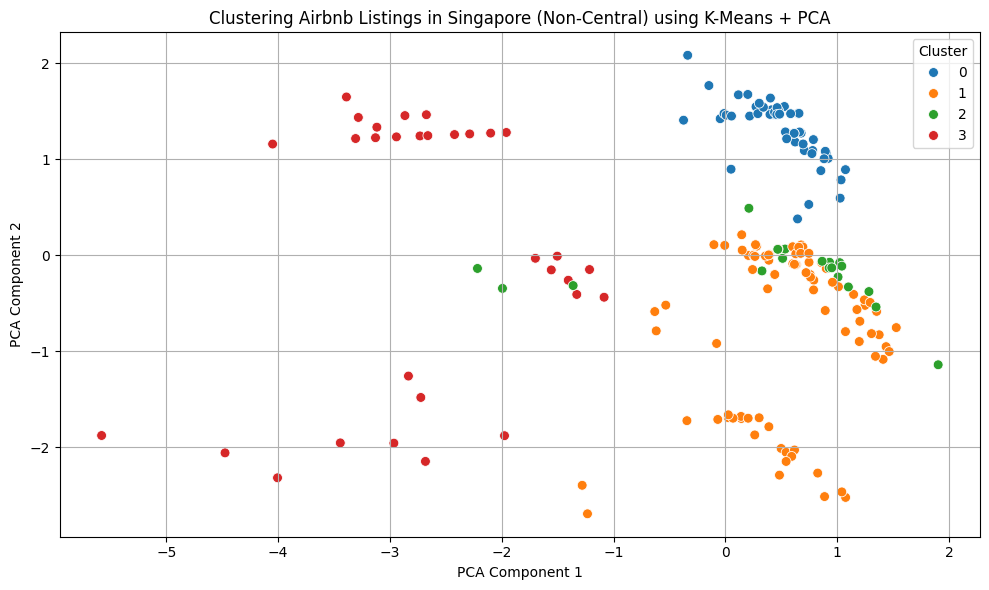

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', s=50)
plt.title('Clustering Airbnb Listings in Singapore (Non-Central) using K-Means + PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_result = df_unsupervised_cleaned.copy()
df_result['cluster'] = clusters


In [ ]:
cluster_region_counts = df_result.groupby(['cluster', 'neighbourhood_group_cleansed']).size().unstack().fillna(0)
print(cluster_region_counts)


neighbourhood_group_cleansed  East Region  North Region  North-East Region  \
cluster                                                                      
0                                     0.0           0.0                0.0   
1                                    66.0           0.0               23.0   
2                                     0.0          19.0                0.0   
3                                     7.0           0.0                9.0   

neighbourhood_group_cleansed  West Region  
cluster                                    
0                                    51.0  
1                                     0.0  
2                                     0.0  
3                                    15.0  


In [ ]:
cluster_feature_means = df_result.groupby('cluster').mean(numeric_only=True)
print(cluster_feature_means)


              price  availability_365  review_scores_rating
cluster                                                    
0         90.274510        293.509804              4.684118
1        102.033708        259.719101              4.780562
2        118.631579        326.263158              4.526316
3        376.483871        346.387097              4.534194


In [ ]:
cluster_feature_means = df_result.groupby('cluster').mean(numeric_only=True)
print(cluster_feature_means)


              price  availability_365  review_scores_rating
cluster                                                    
0         90.274510        293.509804              4.684118
1        102.033708        259.719101              4.780562
2        118.631579        326.263158              4.526316
3        376.483871        346.387097              4.534194


In [ ]:
df_result.to_csv("unsupervised(elian).csv", index=False)
